# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [33]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)


lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")




Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key + "&units=" + units

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
                

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | santiago de cao
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | yilan
Processing Record 6 of Set 1 | haiku-pauwela
Processing Record 7 of Set 1 | kalabo
Processing Record 8 of Set 1 | college
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | ponta delgada
Processing Record 11 of Set 1 | olonkinbyen
Processing Record 12 of Set 1 | port mathurin
Processing Record 13 of Set 1 | mar del plata
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | port lincoln
Processing Record 16 of Set 1 | rongelap
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | trairi
Processing Record 19 of Set 1 | koregaon
Processing Record 20 of Set 1 | castillos
Processing Record 21 of Set 1 | anadyr
Processing Record 22 of Set 1 | walvis bay
Processing 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame((city_data))

# Show Record Count
city_data_df.count()



City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,21.22,83,20,2.06,PT,1722667146
1,port-aux-francais,-49.3500,70.2167,2.89,73,57,11.59,TF,1722667147
2,santiago de cao,-7.9589,-79.2392,17.07,88,100,3.60,PE,1722667149
3,adamstown,-25.0660,-130.1015,20.47,76,33,4.70,PN,1722667150
4,yilan,24.7570,121.7530,37.92,62,6,3.22,TW,1722667151


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,21.22,83,20,2.06,PT,1722667146
1,port-aux-francais,-49.3500,70.2167,2.89,73,57,11.59,TF,1722667147
2,santiago de cao,-7.9589,-79.2392,17.07,88,100,3.60,PE,1722667149
3,adamstown,-25.0660,-130.1015,20.47,76,33,4.70,PN,1722667150
4,yilan,24.7570,121.7530,37.92,62,6,3.22,TW,1722667151


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

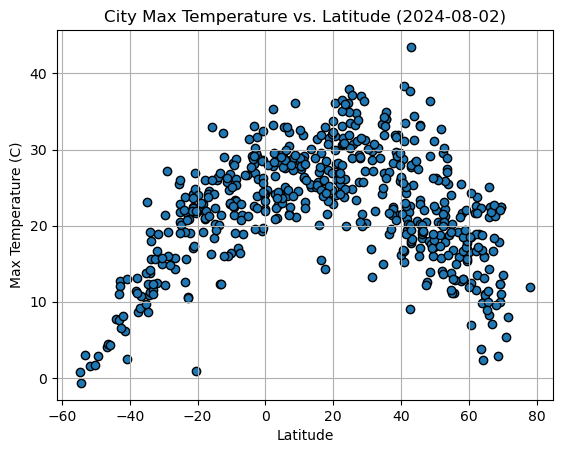

In [13]:
# Build scatter plot for latitude vs. temperature
temp_data = city_data_df["Max Temp"]
lat_data = city_data_df["Lat"]

fig,ax=plt.subplots()
ax.scatter(lat_data, temp_data,edgecolors="black")
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (C)")
ax.set_title("City Max Temperature vs. Latitude (2024-08-02)")
ax.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

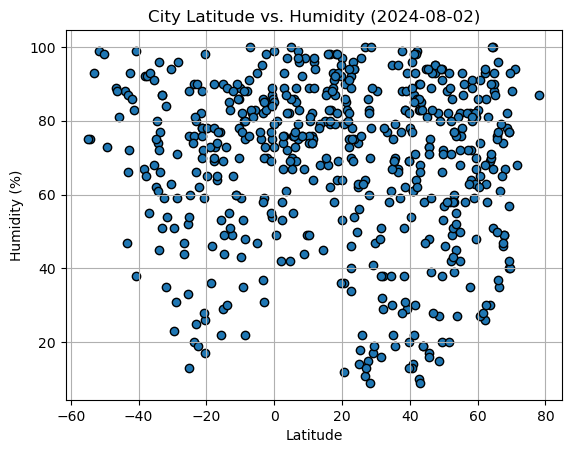

In [14]:
# Build the scatter plots for latitude vs. humidity
humid_data = city_data_df["Humidity"]


# Incorporate the other graph properties
fig,ax=plt.subplots()
plt.scatter(lat_data, humid_data, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2024-08-02)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

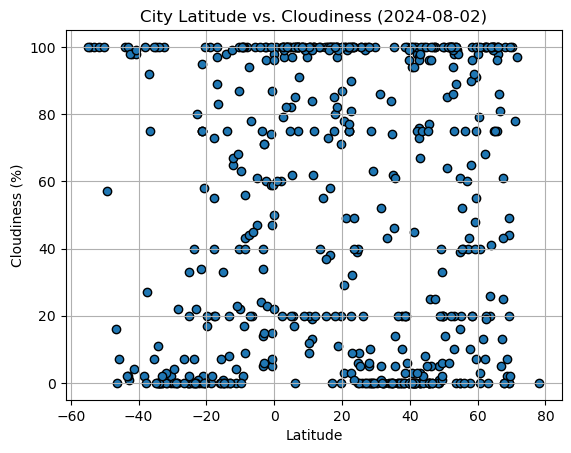

In [15]:
# Build the scatter plots for latitude vs. cloudiness
cloud_data = city_data_df["Cloudiness"]

# Incorporate the other graph properties
fig,ax=plt.subplots()
plt.scatter(lat_data, cloud_data, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2024-08-02)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

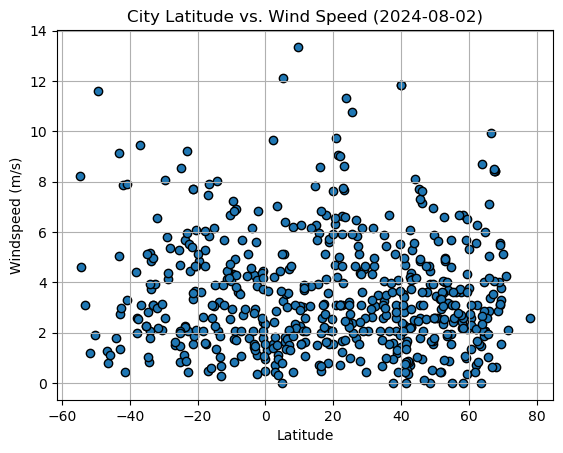

In [16]:
# Build the scatter plots for latitude vs. wind speed
wind_data = city_data_df["Wind Speed"]

# Incorporate the other graph properties
fig,ax=plt.subplots()
plt.scatter(lat_data, wind_data, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (m/s)")
plt.title("City Latitude vs. Wind Speed (2024-08-02)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots

def plot_linear_regression_with_equation(x, y,x_title,y_title,chart_title,equation_coord):
   
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Calculate the regression line
    y_pred = intercept + slope * x

    # Plot data points
    plt.scatter(x, y, label='Data points')

    # Plot regression line
    plt.plot(x, y_pred, color='red', linewidth=2, label='Regression line')

    # Add labels and title
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title(chart_title)
    
    # Annotate the equation on the plot
    equation = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(equation, xy=equation_coord, xycoords='axes fraction', fontsize=12,
                 ha='left', va='top', bbox=dict(boxstyle='round,pad=0.3', edgecolor='gray', facecolor='white'))

    # Show the plot
    plt.show()

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.query('Lat >= 0')
north_lat = northern_hemi_df["Lat"]
north_temp = northern_hemi_df["Max Temp"]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,21.22,83,20,2.06,PT,1722667146
4,yilan,24.7570,121.7530,37.92,62,6,3.22,TW,1722667151
5,haiku-pauwela,20.9219,-156.3051,24.01,90,100,3.09,US,1722667153
7,college,64.8569,-147.8028,10.97,88,100,2.06,US,1722667156
8,bethel,41.3712,-73.4140,24.27,87,100,0.00,US,1722667157


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.query('Lat < 0')
south_lat = southern_hemi_df["Lat"]
south_temp = southern_hemi_df["Max Temp"]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,2.89,73,57,11.59,TF,1722667147
2,santiago de cao,-7.9589,-79.2392,17.07,88,100,3.60,PE,1722667149
3,adamstown,-25.0660,-130.1015,20.47,76,33,4.70,PN,1722667150
6,kalabo,-14.9700,22.6814,20.20,29,0,3.90,ZM,1722667154
11,port mathurin,-19.6833,63.4167,22.20,65,17,4.83,MU,1722667161


###  Temperature vs. Latitude Linear Regression Plot

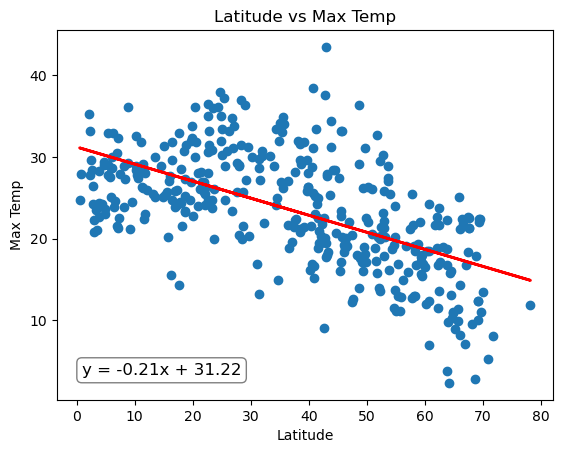

In [20]:
# Linear regression on Northern Hemisphere
plot_linear_regression_with_equation(north_lat,north_temp,"Latitude","Max Temp", "Latitude vs Max Temp",(0.05,0.1))


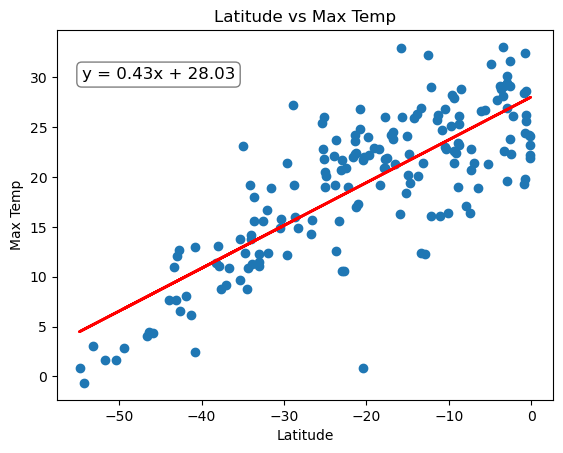

In [21]:
# Linear regression on Southern Hemisphere
plot_linear_regression_with_equation(south_lat,south_temp,"Latitude","Max Temp", "Latitude vs Max Temp",(0.05,0.9))

**Discussion about the linear relationship:** There is a fairly strong positive correlation between latitude and max temperature. This makes a lot of sense since as latitude, or distance from the equator, is perhaps the most apparent geographic indicator of climate. In general, the hottest climates are closest to the equator, with climates tending to become increasingly cooler with increasing distance from the equator.

### Humidity vs. Latitude Linear Regression Plot

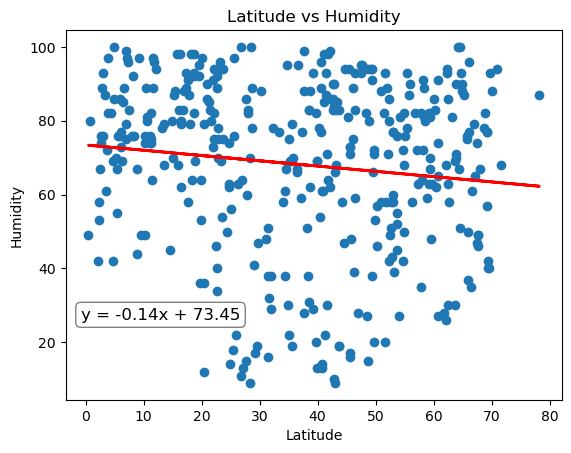

In [34]:
# Northern Hemisphere
north_humid = northern_hemi_df["Humidity"]
plot_linear_regression_with_equation(north_lat,north_humid,"Latitude","Humidity","Latitude vs Humidity",(0.03,0.25))

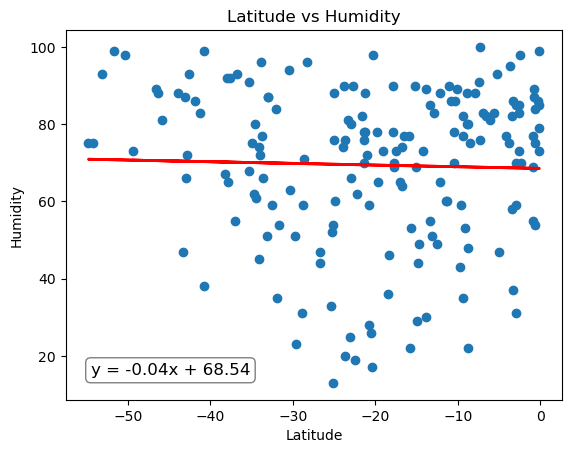

In [35]:
# Southern Hemisphere
south_humid = southern_hemi_df["Humidity"]
plot_linear_regression_with_equation(south_lat,south_humid,"Latitude","Humidity","Latitude vs Humidity",(0.05,0.1))


**Discussion about the linear relationship:** There seems to be almost no correlation between latitude and humidity. Humidity can be caused by many factors outside of location.

### Cloudiness vs. Latitude Linear Regression Plot

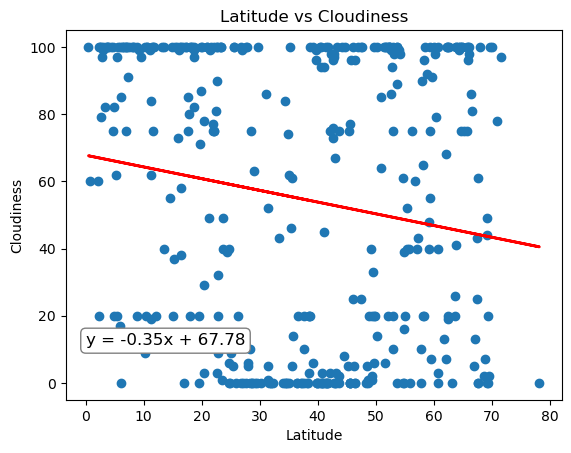

In [26]:
# Northern Hemisphere
north_cloud = northern_hemi_df["Cloudiness"]
plot_linear_regression_with_equation(north_lat,north_cloud,"Latitude","Cloudiness","Latitude vs Cloudiness",(0.04,0.18))

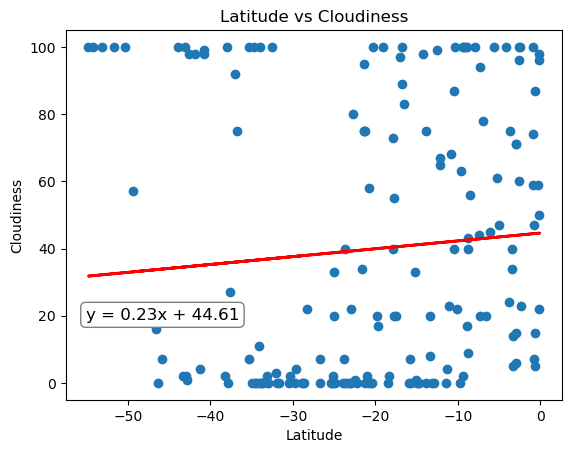

In [27]:
# Southern Hemisphere
south_cloud = southern_hemi_df["Cloudiness"]
plot_linear_regression_with_equation(south_lat,south_cloud,"Latitude","Cloudiness","Latitude vs Cloudiness",(0.04,0.25))

**Discussion about the linear relationship:** Based on the pattern of points on the plot, there seems to be almost no correlation between latitude and cloudiness. While location can have an affect on temperature/moisture which in turn could result in cloudiness, 
it is more likely that cloudiness is influenced by the global weather cycles. 

### Wind Speed vs. Latitude Linear Regression Plot

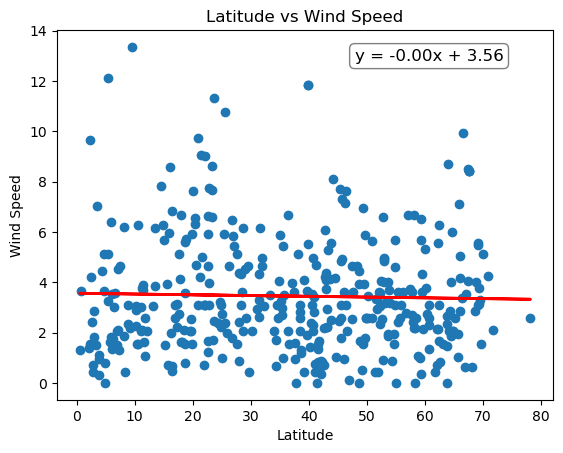

In [28]:
# Northern Hemisphere
north_wind = northern_hemi_df["Wind Speed"]
plot_linear_regression_with_equation(north_lat,north_wind,"Latitude","Wind Speed","Latitude vs Wind Speed",(0.6,0.95))


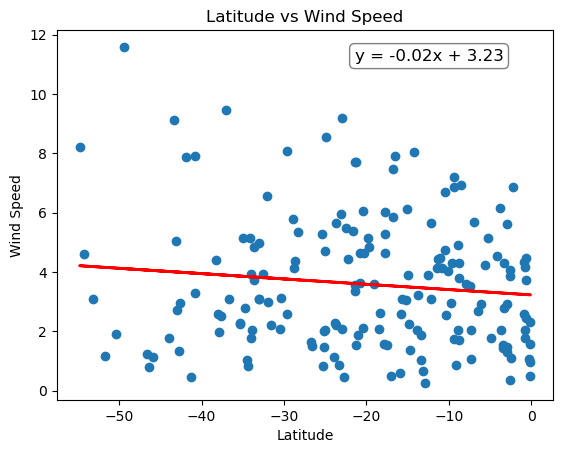

In [29]:
# Southern Hemisphere
south_wind = southern_hemi_df["Wind Speed"]
plot_linear_regression_with_equation(south_lat,south_wind,"Latitude","Wind Speed","Latitude vs Wind Speed",(0.6,0.95))

**Discussion about the linear relationship:** Again we see no correlation between latitude and windspeed as windspeed can be influenced by a variety of factors outside of latitude.